<a href="https://colab.research.google.com/github/OxML2020/practicals/blob/master/OxML2020_RL1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
#OxML 2020: Reinforcement Learning Part 1

**Introduction to Reinforcement Learning and Bandit Problem**

**content creator:** Fatemeh Abdollahi


---





#Section 0: Introduction

Using training information that evaluates the actions are taken rather than instructs by giving correct actions, is the most critical feature distinguishing reinforcement learning from other types of learning. This creates the need for actively exploring for an explicit search for good behaviour. 

**Purely evaluative feedback** indicates how good the action taken was, but not whether it was the best or the worst action possible. However, **purely instructive feedback** indicates the correct action to take, independently of the action taken. This kind of feedback is the basis of **supervised learning**. 

In this notebook, we study the evaluative aspect of reinforcement learning in a simplified setting, which does not involve learning to act in more than one situation. 






#Setup

In [ ]:
# Imports
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ipywidgets as widgets

# Section 1: Multi-Armed Bandit

Multi-Arm Bandit problems are the classic reinforcement learning problem and some of the simplest ones to solve. We have an agent who repeatedly faced with a choice among k different actions. After each choice, it receives a reward that is returned according to a given underlying probability distribution. The game is played over many episodes, and the goal is to maximize the expected total reward or to find the arm with the highest mean value.

Consider a doctor who wants to choose between experimental treatments for a series of seriously ill patients. So each action and reward can be defined as the selection of treatment and the patient's survival or well-being, respectively.

##Section 1.1: Choosing Action
   
The strategy for choosing actions based on our expectations is defined as *policy* (often denoted $\pi$). We could have a random policy -- just pick an arm at random each time -- though this doesn't seem likely to be capable of optimizing our reward. 

In our *k*-armed bandit problem, each of the *k* actions has an expected or mean reward given that action is selected; it is defined as the value of that arm. We denote the action selected on time step $t$ as $A_{t}$, and the corresponding reward as $R_{t}$. 

\begin{align}
q_*(a) \doteq \mathbb{E} [R_{t} | A_{t} = a]
\end{align}
 
In practice, this is often represented as an array of values, where each action's value is a different element in the array.

If you knew the value of each action, then solving the k-armed bandit problem would be easy: you would always select the action with the highest value. We assume that you do not know the action values with certainty, although you may have estimates. We denote the estimated value of action $a$ at time step $t$ as $Q_{t}(a)$. We would like $Q_{t}(a)$ to be close to $q_{*}(a)$.

An obvious choice would be to take the action with the highest value w.r.t $Q_{t}$. This is referred to as the *greedy* policy:

\begin{align}
A_{t} = \text{argmax}_{a} \; Q_{t} (a)
\end{align}

where our choice action is the one that maximizes the current value function. While you are following greedy policy, you are *exploiting* your current knowledge of the value of the actions. However, if you select one of the *nongreedy* actions, then you are *exploring*, because you can improve your estimate of the nongreedy action's value as well. 

So, the greedy policy does have a fatal flaw: it easily gets trapped in local maxima. It never explores to see what it hasn't seen before if one option is already better than the others. This leads us to a fundamental challenge in coming up with effective policies.

##Section 1.2: The Exploitation-Exploration Dilemma

*Exploitation* is the right thing to do to maximize the expected reward on the one step, but *exploration* may produce the greater total reward in the long run, if we always stick to the safe bet, we don't know what we are missing. Sometimes we aren't missing much of anything, and regret not sticking with our preferred choice, yet other times we stumble upon something new that was way better than we thought.

If you have many time steps ahead on which to make action selections, then it may be better to explore the nongreedy actions and discover which of them are better than the greedy action. Reward is lower in the short run, during exploration, but higher in the long run because after you have discovered the better actions, you can exploit them many times. 

Because it is not possible both to explore and to exploit with any single action selection, one often refers to the “conflict” between exploration and exploitation.

In any specific case, whether it is better to explore or exploit depends in a complex way on the precise values of the estimates, uncertainties, and the number of remaining steps. There are many sophisticated methods for balancing exploration and exploitation for particular mathematical formulations of the k-armed bandit and related problems.

A simple extension to our greedy policy is to add some randomness. For instance, a coin flip -- heads we take the best choice now, tails we pick one at random. This is referred to as the $\epsilon$-greedy policy:

\begin{align}
A \leftarrow
        \begin{cases}
        \text{argmax}_{a} \; Q_{t} (a)    & \quad \text {with probability  1 - }\epsilon  \\
        \text{a random action}        & \quad \text{with probibility } \epsilon 
        \end{cases} 
\end{align}

which is to say that the probability of selecting the greedy choice is equal to 1 - $\epsilon$ for $\epsilon \in [0,1]$ otherwise we select the action at random.

Despite its relative simplicity, the epsilon-greedy policy is quite effective, which leads to its general popularity.

### Exercise 1: Implement Epsilon-Greedy

In this exercise you will implement the epsilon-greedy algorithm for deciding which action to take from a set of possible actions given their value function and a probability $\epsilon$ of simply chosing one at random. 

HINT: You may find [`np.random.random`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.random.html), [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html), and [`np.argmax`](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) useful here.

In [ ]:
def choose_action(qEst, epsilon):
  # write a boolean expression that determines if we should take the best action
  be_greedy = ...
  if be_greedy:
    # write an expression for selecting the best action from the action values
    action = ...
  else:
    # write an expression for selecting a random action
    action = ...

  return action

##Section 1.3: Learning from Reward

Now that we have a policy for deciding what to do, how do we learn from our actions?

One way to do this is just to keep a record of every result we ever got and use the averages for each action. If we have a potentially very long-running episode, the computational cost of keeping all these values and recomputing the mean over and over again isn't ideal. Instead, we can use a streaming mean calculation, which looks like this:

\begin{align}
q_{t+1}(a) \leftarrow q_{t}(a) + \frac{1}{n_t(a)} (r_{t} - q_{t}(a))
\end{align}

where our action-value function $q_t(a)$ is the mean of the rewards of action $a$ seen so far, $n_t$ is the number of $a$ is taken until time $t$, and $r_t$ is the reward just received for taking action $a$.

###Exercise 2: Updating Action Value

In this exercise, you will implement the action-value update rule above. The function will take in the action-value function represented as an array $q$, the action taken, the true action-value $q_{*} $, and an array that keeps how many times each action has been selected. The function will return the reward, action_count, and updated value for the selected action.

In [ ]:
def take_action(action, qEst, qTrue, action_count):
  # generate the reward under N(real reward, 1)
  reward = np.random.randn() + qTrue[action]
  action_count[action] += 1
  # update estimation using sample averages
  qEst[action] = ...

  return reward, action_count, qEst

##Exercise 3: Playing with Bandit

In this exercise, you should use ```
choose_action(...)``` and ```
take_action(...)``` to play with your Bandit. The inputs of ```
play_Bandit(...)``` are  1)the number of plays, 2)maximum time step that we would like to play 3)epsilon for $\epsilon-greedy$  policy, and 4) the number of arms that we have in our problem.

The outputs are 1)the average of the reward received up to time step $t$ over the number of plays (to have more smooth graph), and 2)the percentage of taking the best action at time $t$ over the number of plays.

In [ ]:
def play_Bandit(n_Bandits, max_time_step, epsilon, k):

  average_rewards = np.zeros((max_time_step))
  bestActionCounts = np.zeros((max_time_step))

  for i in range (0, n_Bandits):
    #reset the environment (each i is a new experiment)
    
    #initial the estimated q values and action_count
    qEst = ...
    action_count = ...

    qTrue = []
    for i in range(0, k):
      # initialize real rewards with N(0,1) distribution
      qTrue.append(np.random.randn())

    #determine the best action w.r.t. true q values
    bestAction = ...

    #lets play with k-armed Bandit
    for time_step in range(0, max_time_step):
      #choose action based on the policy
      action = ...
      #take the selected action
      reward, action_count, qEst = ...
      average_rewards[time_step] += reward

      if action == bestAction:
        bestActionCounts[time_step] += 1
  
  bestActionCounts /= n_Bandits
  average_rewards /= n_Bandits
  return bestActionCounts, average_rewards


So let's see the averaged reward and the percentage of choosing the best action for different epsilons: ``` [0, 0.1, 0.01] ```!



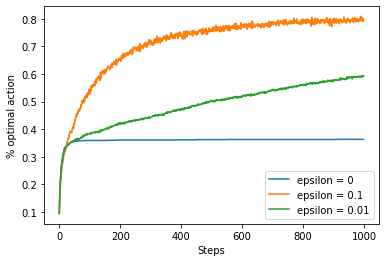

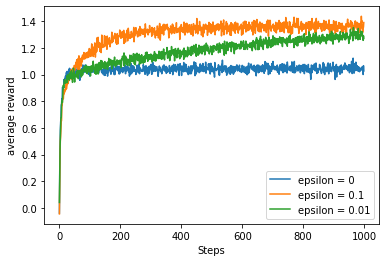

In [ ]:
#@title averaged reward and %taking best action 
figureIndex = 0
def epsilonGreedy(nBandits, max_time_step, k):
  epsilons = [0, 0.1, 0.01]
  bestActionCounts_all =[]
  averageRewards_all =[]
  for eps in epsilons:
    bestActionCounts, averageRewards = play_Bandit(nBandits, max_time_step, eps, k)
    bestActionCounts_all.append(bestActionCounts)
    averageRewards_all.append(averageRewards)

  global figureIndex
  plt.figure(figureIndex)
  figureIndex += 1
  for eps, counts in zip(epsilons, bestActionCounts_all):
      plt.plot(counts, label='epsilon = '+str(eps))
  plt.xlabel('Steps')
  plt.ylabel('% optimal action')
  plt.legend()
  plt.figure(figureIndex)
  figureIndex += 1
  for eps, rewards in zip(epsilons, averageRewards_all):
      plt.plot(rewards, label='epsilon = '+str(eps))
  plt.xlabel('Steps')
  plt.ylabel('average reward')
  plt.legend()

  plt.show()

epsilonGreedy(2000, 1000, 10)

##Live Show: Number of Arms

Let's try different number of arms and see its effect on our graphs!

In [ ]:
#@title

#@markdown Make sure you execute this cell to enable the widget!

@widgets.interact_manual(n_arms=widgets.IntSlider(10, min=2, max=15))
def explore_bandit_parameters(k=10):
  epsilonGreedy(1000, 500, k)

interactive(children=(IntSlider(value=10, description='k', max=30, min=-10), Button(description='Run Interact'…

#Resources

1. Neuromatch [RL Tutorial](https://github.com/NeuromatchAcademy/course-content/tree/master/tutorials/W2D5_ReinforcementLearning)
2. [RL an introduction -solutions](https://github.com/JaeDukSeo/reinforcement-learning-an-introduction/blob/master/chapter02/TenArmedTestbed.py)
3. [RL an introduction, second edition](http://www.incompleteideas.net/book/the-book.html)